In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df1=pd.read_csv('events1.csv')
df1.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


In [3]:
df2=pd.read_csv('items.csv')
df2.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [4]:
df3=pd.read_csv('users.csv')
df3.head()

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38


In [5]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id',
       'date'],
      dtype='object')
Index(['id', 'name', 'brand', 'variant', 'category', 'price_in_usd'], dtype='object')
Index(['id', 'ltv', 'date'], dtype='object')


In [6]:
# Rename 'item_id' in df1 to 'id' for merging with df2
df1.rename(columns={'item_id': 'id'}, inplace=True)

# Merge df1 and df2 on the 'id' column
merged_df = pd.merge(df1, df2, on='id', how='inner')

# Merge the result with df3 on 'user_id' from df1 and 'id' from df3
final_merged_df = pd.merge(merged_df, df3, left_on='user_id', right_on='id', how='inner')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())

   user_id  ga_session_id country   device         type  id_x  \
0     2133          16909      US   mobile     purchase    94   
1     2133          16909      US   mobile     purchase   425   
2     5789          16908      SE  desktop     purchase     1   
3     5789          16908      SE  desktop     purchase    62   
4     5808           4267      US   mobile  add_to_cart   842   

                date_x                               name   brand  \
0  2020-11-01 00:27:14            Google Large Tote White  Google   
1  2020-11-01 00:27:14  Google Heather Green Speckled Tee  Google   
2  2020-11-01 01:44:44                     Google KeepCup  Google   
3  2020-11-01 01:44:44              Google Mini Kick Ball  Google   
4  2020-11-01 03:06:29     Google Infant Hero Onesie Grey  Google   

              variant category  price_in_usd  id_y  ltv               date_y  
0  Single Option Only     Bags            10  2133   34  2020-11-01 00:09:55  
1                  XL  Apparel      

In [7]:
# Rename columns for clarity
final_merged_df.rename(columns={'id_x': 'id', 'date_x': 'event_date', 'date_y': 'user_date'}, inplace=True)

# Drop duplicate 'id_y' column (since 'id' now refers to 'id_x')
final_merged_df.drop(columns=['id_y'], inplace=True)

# Display the cleaned DataFrame
print(final_merged_df.head())

   user_id  ga_session_id country   device         type   id  \
0     2133          16909      US   mobile     purchase   94   
1     2133          16909      US   mobile     purchase  425   
2     5789          16908      SE  desktop     purchase    1   
3     5789          16908      SE  desktop     purchase   62   
4     5808           4267      US   mobile  add_to_cart  842   

            event_date                               name   brand  \
0  2020-11-01 00:27:14            Google Large Tote White  Google   
1  2020-11-01 00:27:14  Google Heather Green Speckled Tee  Google   
2  2020-11-01 01:44:44                     Google KeepCup  Google   
3  2020-11-01 01:44:44              Google Mini Kick Ball  Google   
4  2020-11-01 03:06:29     Google Infant Hero Onesie Grey  Google   

              variant category  price_in_usd  ltv            user_date  
0  Single Option Only     Bags            10   34  2020-11-01 00:09:55  
1                  XL  Apparel            21   34  202

In [8]:
final_merged_df.head()

,user_id,ga_session_id,country,device,type,id,event_date,name,brand,variant,category,price_in_usd,ltv,user_date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Single Option Only,Bags,10,34,2020-11-01 00:09:55
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,XL,Apparel,21,34,2020-11-01 00:09:55
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,Single Option Only,New,28,72,2020-10-14 00:26:03
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Single Option Only,Fun,2,72,2020-10-14 00:26:03
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25,0,2020-08-18 03:44:52


In [9]:
df=final_merged_df

In [10]:
df.shape

(758884, 14)

In [11]:
shape = df.shape
print('The number of lines presented in this dataset are {}'.format(shape[0]))
print('The number of columns presented in this dataset are {}'.format(shape[1]))

The number of lines presented in this dataset are 758884
The number of columns presented in this dataset are 14


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   id             758884 non-null  int64 
 6   event_date     758884 non-null  object
 7   name           758884 non-null  object
 8   brand          758884 non-null  object
 9   variant        122624 non-null  object
 10  category       758884 non-null  object
 11  price_in_usd   758884 non-null  int64 
 12  ltv            758884 non-null  int64 
 13  user_date      758884 non-null  object
dtypes: int64(5), object(9)
memory usage: 81.1+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,758884.0,29541.809665,55129.337846,1.0,8401.0,17181.0,25809.0,270145.0
ga_session_id,758884.0,3632.325492,3952.875337,0.0,625.0,2103.0,5365.0,18033.0
id,758884.0,885.629356,289.267126,0.0,913.0,972.0,1040.0,1380.0
price_in_usd,758884.0,24.759137,20.892459,1.0,11.0,22.0,30.0,313.0
ltv,758884.0,61.428210,124.049917,0.0,0.0,0.0,80.0,1530.0


<Axes: >

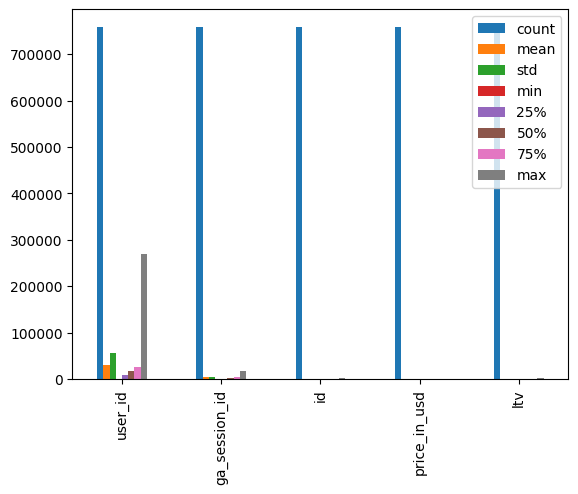

In [14]:
df.describe().T.plot(kind='bar')

In [15]:
df.columns.tolist()

['user_id',
 'ga_session_id',
 'country',
 'device',
 'type',
 'id',
 'event_date',
 'name',
 'brand',
 'variant',
 'category',
 'price_in_usd',
 'ltv',
 'user_date']

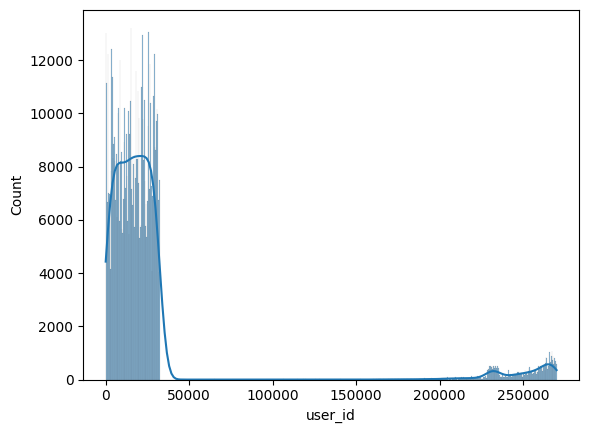

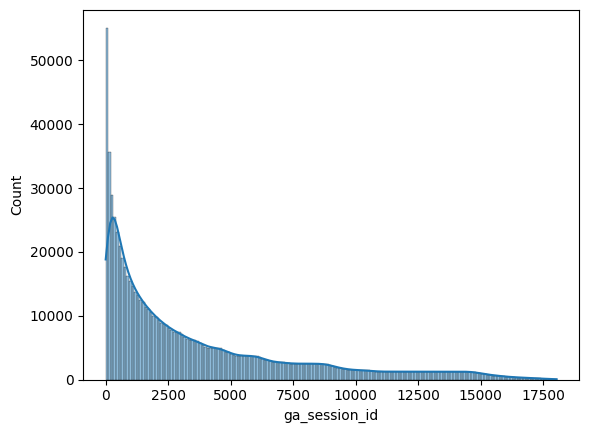

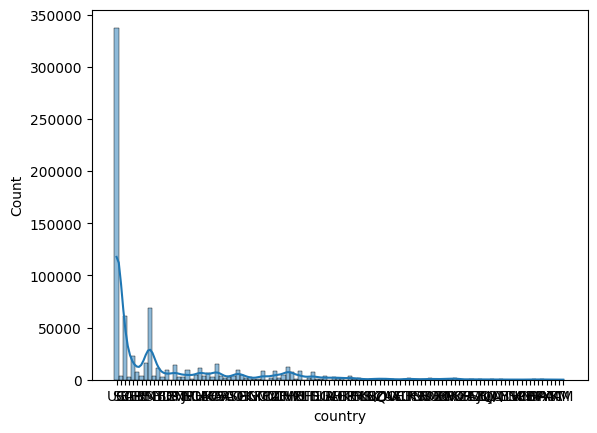

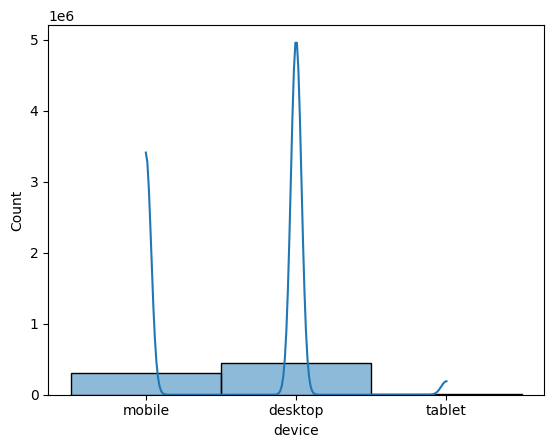

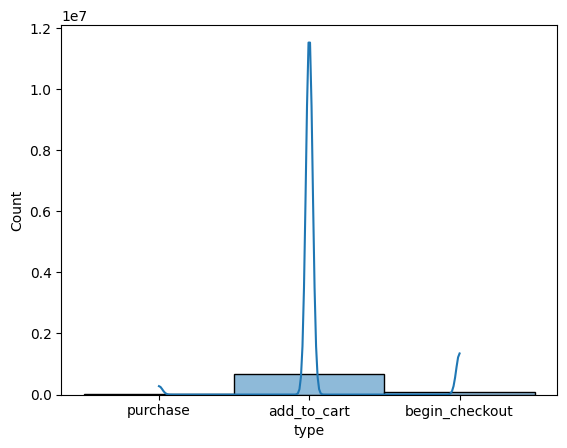

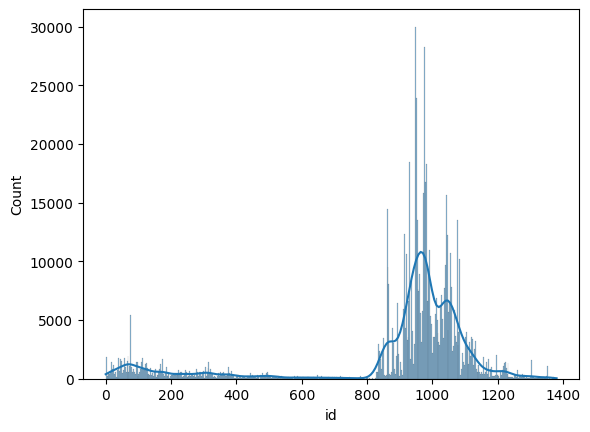

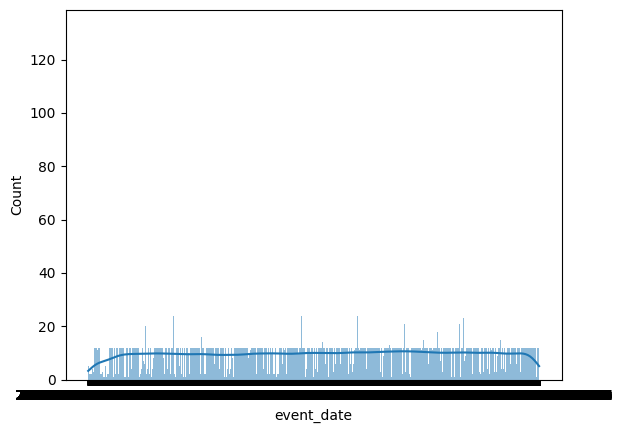

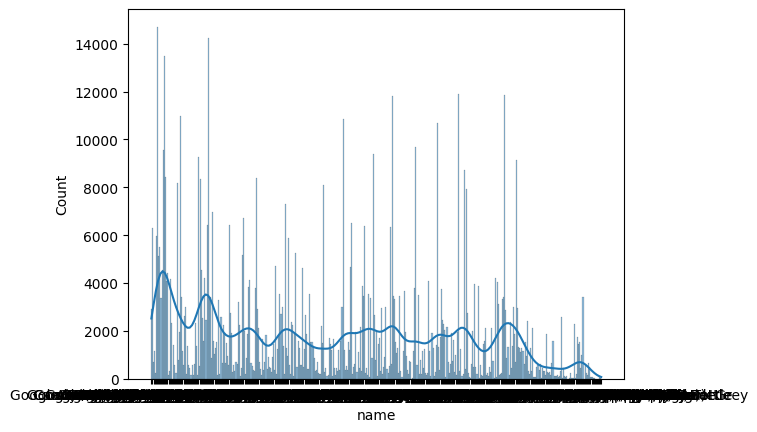

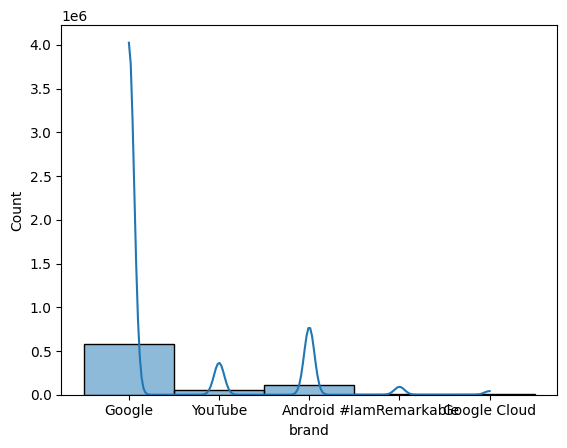

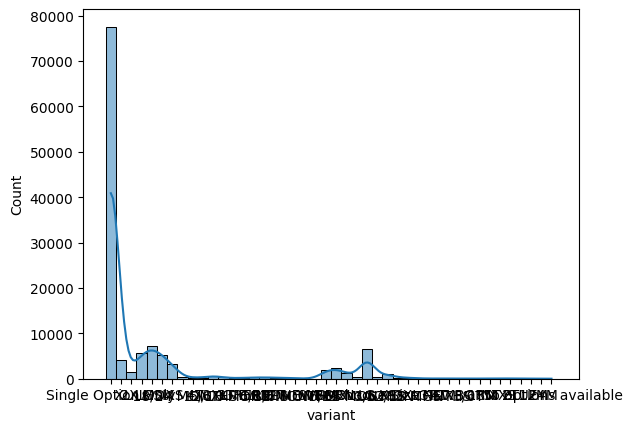

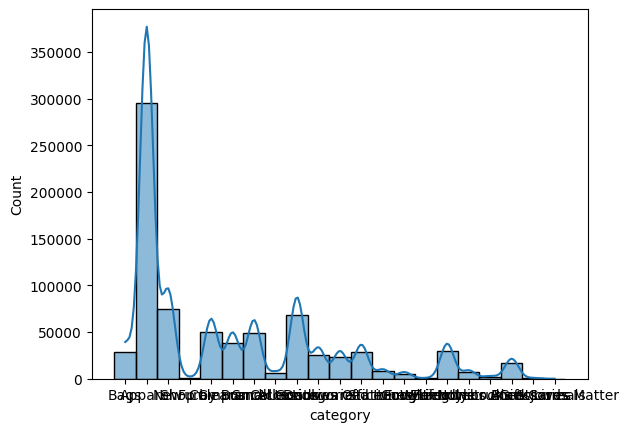

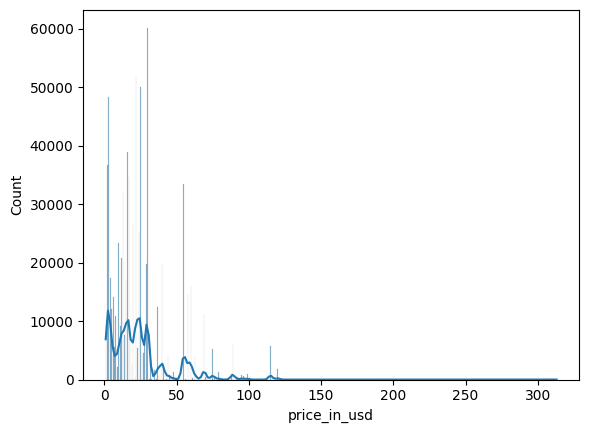

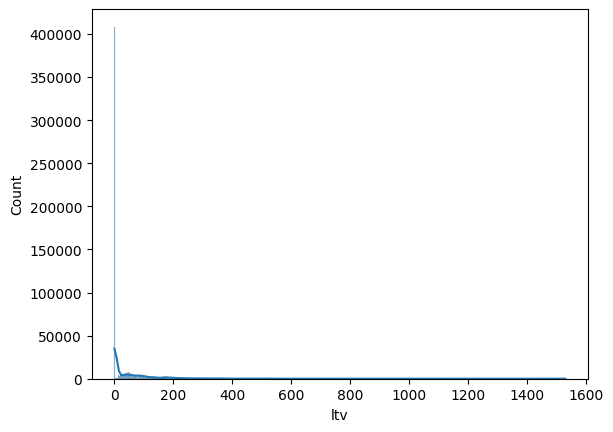

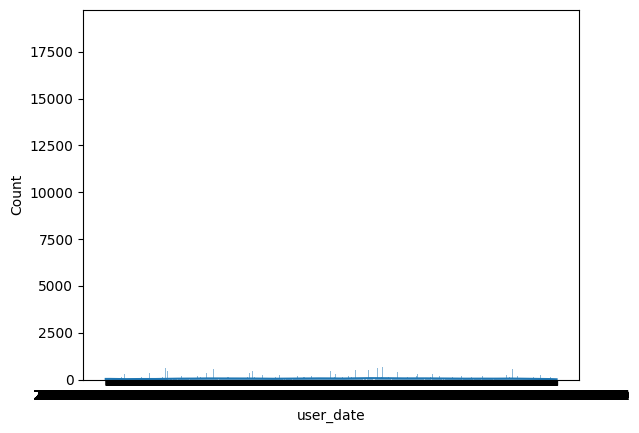

In [16]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

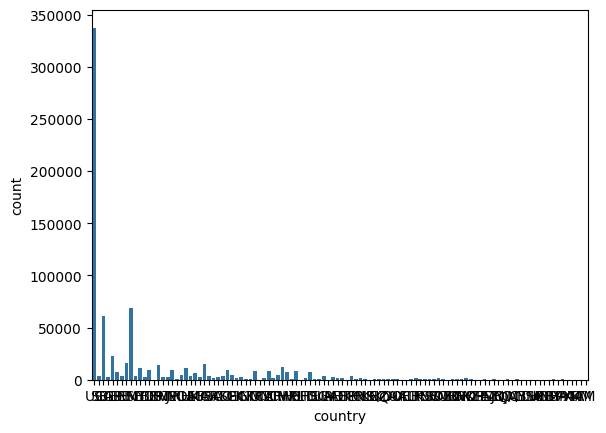

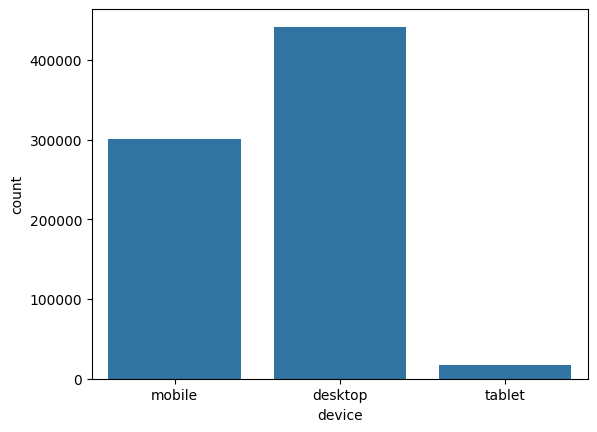

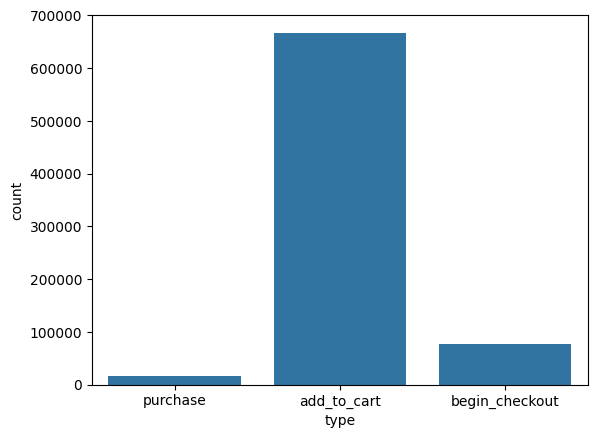

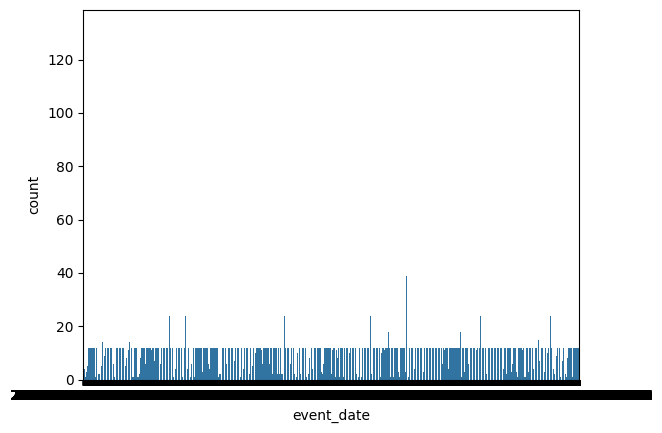

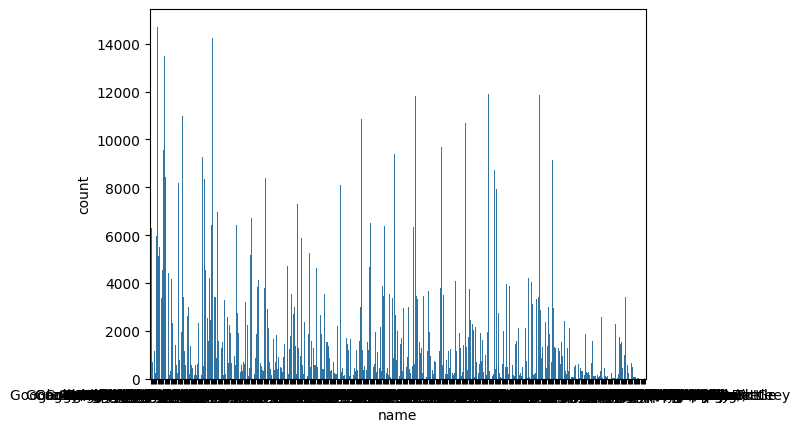

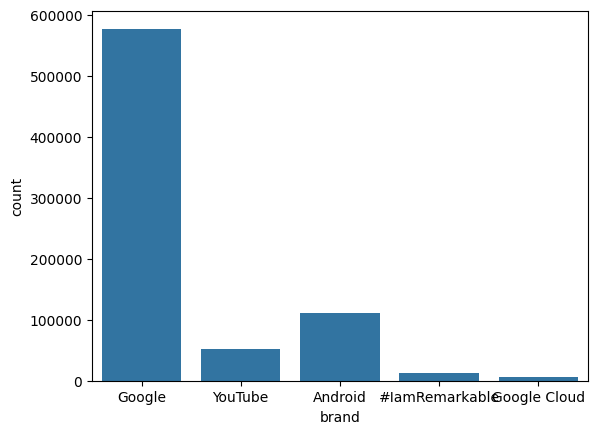

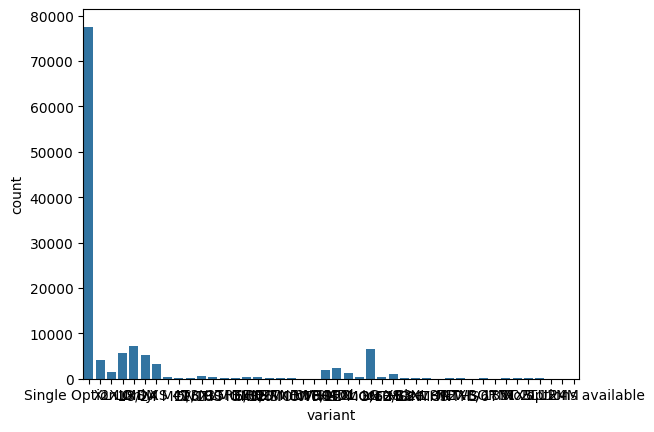

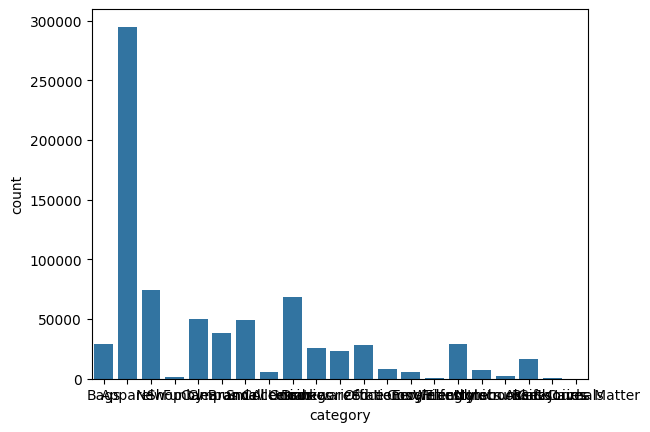

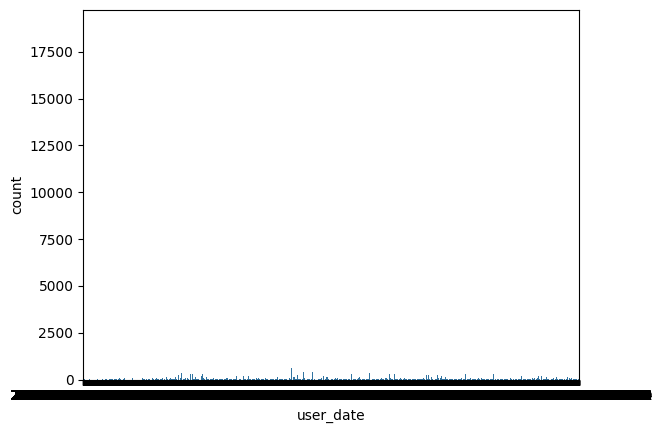

In [17]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

In [18]:
df

,user_id,ga_session_id,country,device,type,id,event_date,name,brand,variant,category,price_in_usd,ltv,user_date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Single Option Only,Bags,10,34,2020-11-01 00:09:55
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,XL,Apparel,21,34,2020-11-01 00:09:55
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,Single Option Only,New,28,72,2020-10-14 00:26:03
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Single Option Only,Fun,2,72,2020-10-14 00:26:03
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25,0,2020-08-18 03:44:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08,Google Pocket Tee Grey,Google,NaN,Apparel,29,0,2021-01-31 23:56:44
758880,234237,12443,IN,desktop,add_to_cart,973,2021-01-31 23:59:08,Android Super Hero 3D Framed Art,Android,NaN,Accessories,40,0,2021-01-31 23:56:44
758881,234237,12443,IN,desktop,add_to_cart,915,2021-01-31 23:59:08,Android Large Removable Sticker Sheet,Android,NaN,Accessories,3,0,2021-01-31 23:56:44
758882,234237,12443,IN,desktop,add_to_cart,919,2021-01-31 23:59:08,Android SM S/F18 Sticker Sheet,Android,NaN,Accessories,3,0,2021-01-31 23:56:44


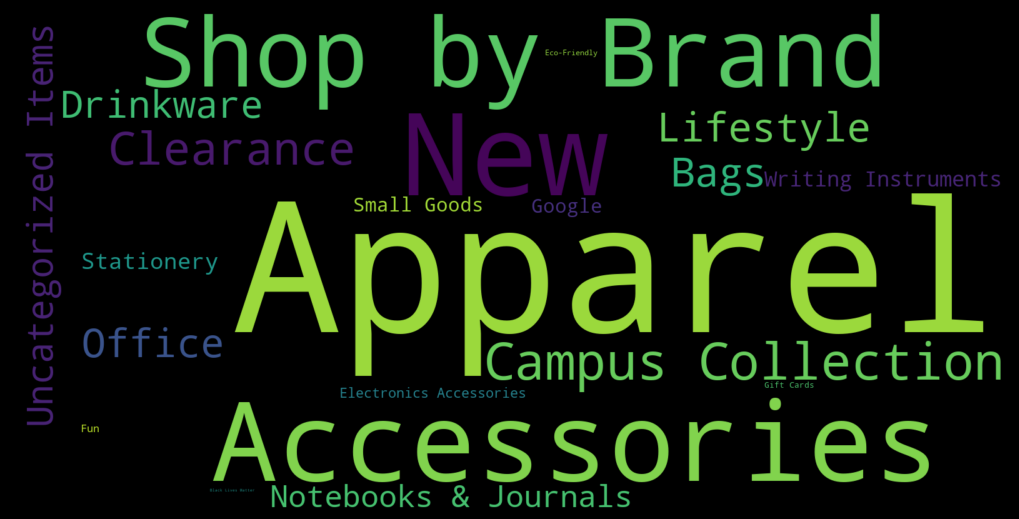

In [19]:
# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["category"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()